In [66]:
import numpy as np 
import pandas as pd
from scipy.io import loadmat
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import torch
from torchvision import datasets, transforms
from keras.datasets import mnist

RANDOM_SEED = 42
torch.backends.cudnn.enabled = False
torch.manual_seed(RANDOM_SEED)

In [67]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

train_array = np.empty([60000,1,28,28], dtype=int)

for idx,data in enumerate(train_X):
    train_array[idx,0] = data

test_array = np.empty([10000,1,28,28], dtype=int)

for idx,data in enumerate(test_X):
    test_array[idx,0] = data

train_tensor_X = torch.from_numpy(train_array)
test_tensor_X = torch.from_numpy(test_array)

train_tensor_Y = torch.from_numpy(train_y)
test_tensor_Y = torch.from_numpy(test_y)

trainset = torch.utils.data.TensorDataset(train_tensor_X, train_tensor_Y)
testset = torch.utils.data.TensorDataset(test_tensor_X, test_tensor_Y)

In [68]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)
    
net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2_drop): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=320, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=10, bias=True)
)


c:\users\prashant\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Train Epoch: 0 [0/60000 (0%)]	Loss: 35.834641
Train Epoch: 0 [6400/60000 (0%)]	Loss: 1.998448
Train Epoch: 0 [12800/60000 (0%)]	Loss: 1.452994
Train Epoch: 0 [19200/60000 (0%)]	Loss: 1.562438
Train Epoch: 0 [25600/60000 (0%)]	Loss: 1.346361
Train Epoch: 0 [32000/60000 (0%)]	Loss: 1.017131
Train Epoch: 0 [38400/60000 (0%)]	Loss: 1.140724
Train Epoch: 0 [44800/60000 (0%)]	Loss: 0.651004
Train Epoch: 0 [51200/60000 (0%)]	Loss: 0.935216
Train Epoch: 0 [57600/60000 (0%)]	Loss: 0.695040


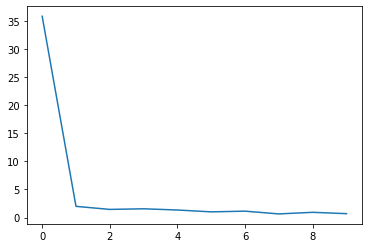

In [69]:
LEARNING_RATE = 0.01
MOMENTUM = 0.5
LOG_INTERVAL = 100
EPOCHS=1
BATCH_SIZE=64

mnist_net = Net()

optimizer = optim.SGD(mnist_net.parameters(), lr=LEARNING_RATE,
                      momentum=MOMENTUM)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=1, shuffle=False)

train_losses = []
train_counter = []

def train(epoch):
    mnist_net.train()
    for idx, (data, target) in enumerate(trainloader):
        optimizer.zero_grad() #TODO
        output = mnist_net(data.float())
        loss = F.nll_loss(output, target.long())
        loss.backward()
        optimizer.step()
        if idx % LOG_INTERVAL == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(epoch, idx * len(data), len(trainloader.dataset), 00. * idx / len(trainloader), loss.item()))
            train_losses.append(loss.item())
            train_counter.append((idx*BATCH_SIZE) + ((epoch-1)*len(trainloader.dataset)))

for i in range(0,EPOCHS):
    train(i)
    
plt.plot(train_losses)

In [70]:
test_losses = []

def test():
    mnist_net.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for idx, (data, target) in enumerate(testloader):
            output = mnist_net(data.float())
            test_loss += F.nll_loss(output, target.long(), size_average=False).item()
            pred = output.data.max(1, keepdim=True)[1]
            correct += pred.eq(target.data.view_as(pred)).sum()
    test_loss /= len(testloader.dataset)
    test_losses.append(test_loss)
    print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(testloader.dataset),
        100. * correct / len(testloader.dataset)))   

test()

c:\users\prashant\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.



Test set: Avg. loss: 0.4027, Accuracy: 8735/10000 (87%)

